# Setup
We use the CPU version of pytorch since we will only be doing simple data augmentation locally in this notebook.

In [71]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install ultralytics
!pip install opencv-python

Looking in indexes: https://download.pytorch.org/whl/cpu


# Binary Mask Conversion
Each pixel value corresponds to a class for conversion to yolo-seg. For our purposes making the background black (which is standard) and our class white (255,255,255) is easiest to look at but if we want the wells to be class 1 (wells) then we want its value to be converted to (1,1,1)

In [ ]:
import cv2
import os

mask_dir = "../dataset/masks"
output_dir = "masks-converted"

os.makedirs(output_dir, exist_ok=True)

for fname in os.listdir(mask_dir):
    path = os.path.join(mask_dir, fname)
    mask = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if mask is None:
        print(f"Skipping {fname}, not a valid image.")
        continue

    # Replace pixel value 255 with 1
    mask[mask == 255] = 1

    # Save to new directory
    output_path = os.path.join(output_dir, fname)
    cv2.imwrite(output_path, mask)
    print(f"Processed and saved {output_path}")


Processed and saved masks-converted/Pilot Week 3 Day 7 Plate 3.png
Processed and saved masks-converted/A-image-20241121-082740.png


In [ ]:
from ultralytics.data.converter import convert_segment_masks_to_yolo_seg

convert_segment_masks_to_yolo_seg("masks-converted", "../dataset/labels", classes=2)

Processing masks-converted/Pilot Week 3 Day 7 Plate 3.png imgsz = 3040 x 4056
Processed and stored at ../dataset/labels/train/Pilot Week 3 Day 7 Plate 3.txt imgsz = 3040 x 4056
Processing masks-converted/A-image-20241121-082740.png imgsz = 3040 x 4056
Processed and stored at ../dataset/labels/train/A-image-20241121-082740.txt imgsz = 3040 x 4056


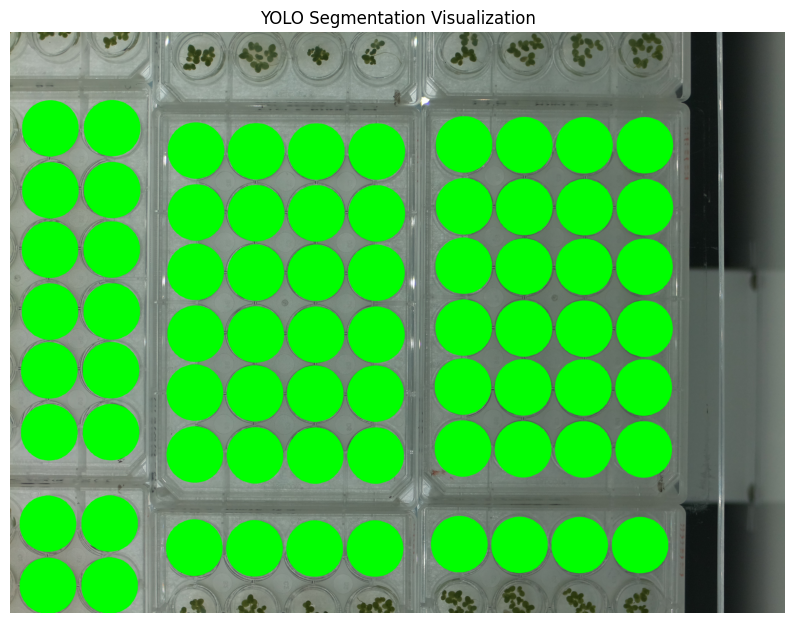

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Set paths
image_path = '../dataset/images/A-image-20241121-082740.jpg'
label_path = '../dataset/labels/A-image-20241121-082740.txt'

# Load image
image = cv2.imread(image_path)
image_height, image_width = image.shape[:2]

# Read YOLO segmentation data
with open(label_path, 'r') as f:
    lines = f.read().strip().split('\n')

for line in lines:
    parts = line.strip().split()
    class_id = int(parts[0])
    coords = list(map(float, parts[1:]))

    # Group into (x, y) pairs and denormalize
    points = np.array([
        [int(x * image_width), int(y * image_height)]
        for x, y in zip(coords[::2], coords[1::2])
    ], np.int32)

    # Draw filled polygon
    cv2.polylines(image, [points], isClosed=True, color=(0,255,0), thickness=9)
    cv2.fillPoly(image, [points], color=(0, 255, 0, 30))

# Convert BGR to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Show the image
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.title('YOLO Segmentation Visualization')
plt.axis('off')
plt.show()